The bar graph shows how much the run time differs between  the two.

Obviously, paper proxy has more runtime.


New Proxy runtime for N=3: 0.037737369537353516
Paper Proxy runtime for N=3: 0.003926753997802734
New Proxy runtime for N=3: 0.0008115768432617188
Paper Proxy runtime for N=3: 0.0008728504180908203
New Proxy runtime for N=3: 0.027687788009643555
Paper Proxy runtime for N=3: 0.003788471221923828
New Proxy runtime for N=3: 0.050064802169799805
Paper Proxy runtime for N=3: 0.004535675048828125
New Proxy runtime for N=3: 0.04640650749206543
Paper Proxy runtime for N=3: 0.0044574737548828125
New Proxy runtime for N=3: 0.027153730392456055
Paper Proxy runtime for N=3: 0.0037987232208251953
New Proxy runtime for N=3: 0.03313946723937988
Paper Proxy runtime for N=3: 0.00394892692565918
New Proxy runtime for N=3: 0.04899716377258301
Paper Proxy runtime for N=3: 0.004426240921020508
New Proxy runtime for N=3: 0.04801177978515625
Paper Proxy runtime for N=3: 0.004673957824707031
New Proxy runtime for N=3: 0.028555631637573242
Paper Proxy runtime for N=3: 0.00402069091796875
New Proxy runtime for 

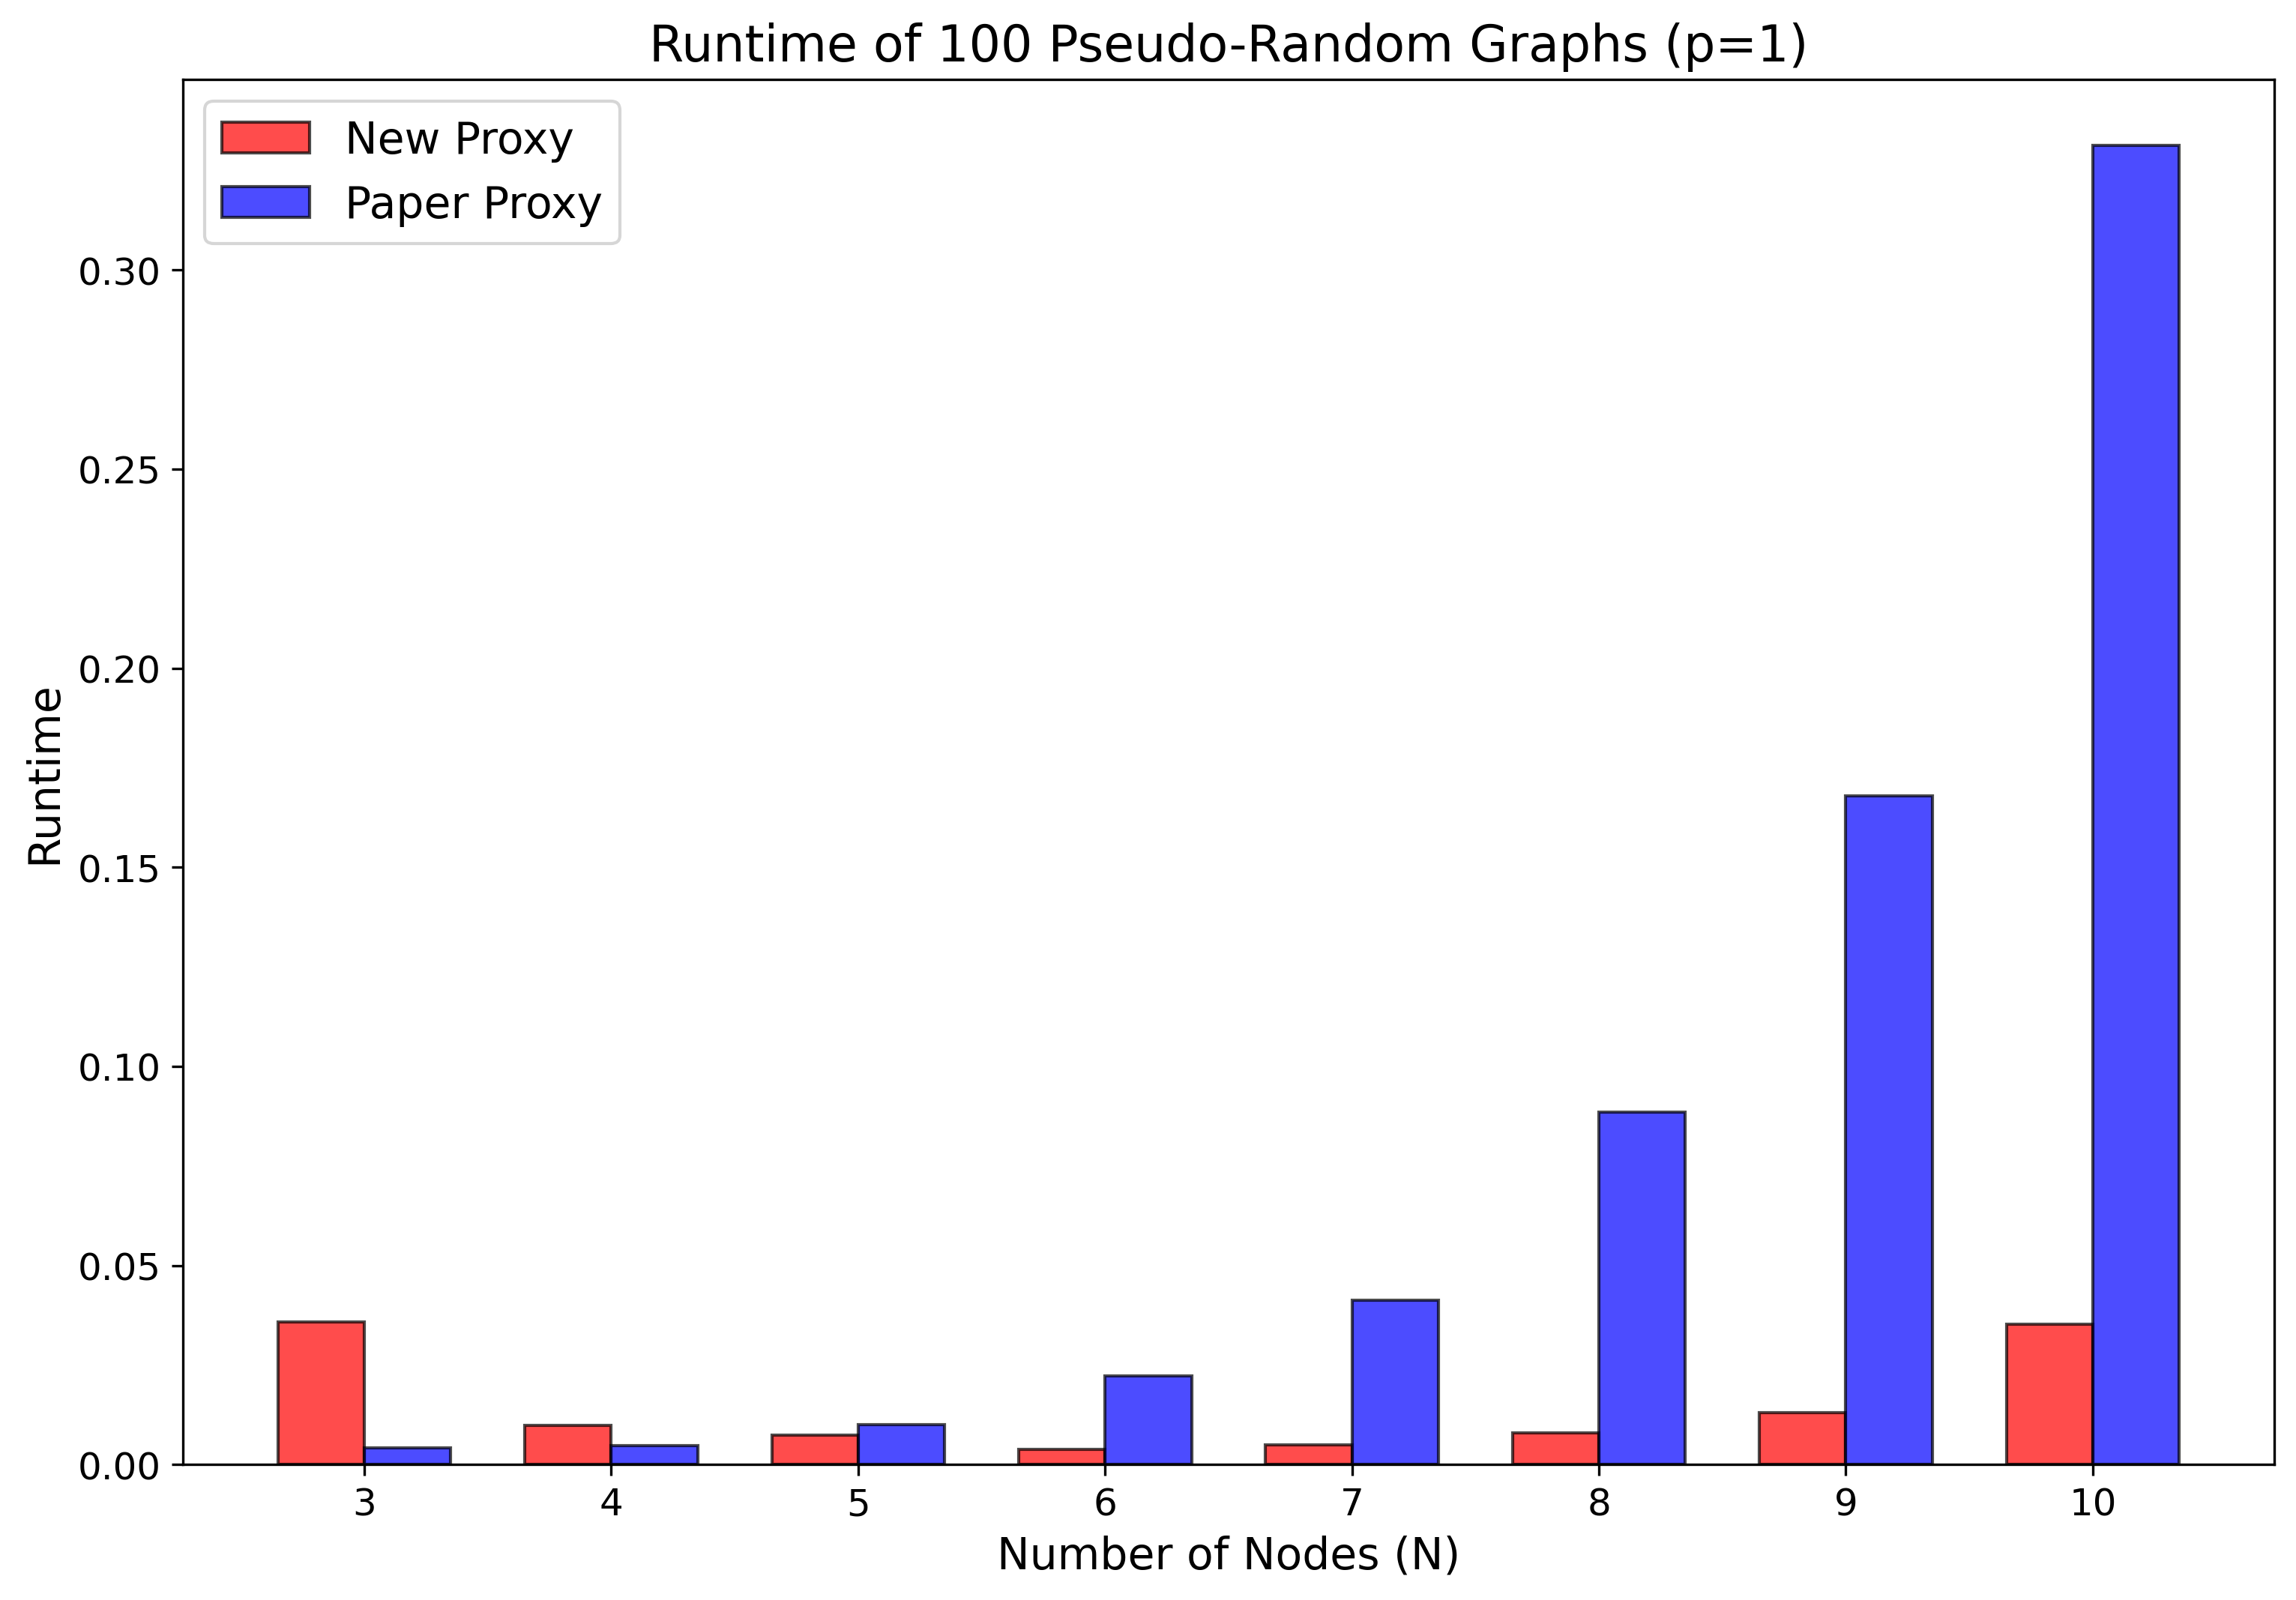

In [3]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp
import os  # データ保存に必要

# QAOAの層数
p = 1

runtime_new_proxy = []
runtime_paper_proxy = []

# 試行回数
T = 100

# 保存先ディレクトリを指定
save_dir = f"data_for_graphs_runtime_P={p}_T={T}"
os.makedirs(save_dir, exist_ok=True)

# Nを5から10まで変化させて計算
for N in range(3, 11):
    runtime_new_proxy_i = []
    runtime_paper_proxy_i = []

    for i in range(T):
        G = nx.erdos_renyi_graph(N, 0.5)
        ising_model = mc.get_maxcut_terms(G)
        sim = get_simulator(N, ising_model)

        init_gamma, init_beta = np.full((2, p), 0.1)

        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_new_proxy_i.append(runtime)
            print(f"New Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for New Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_new_proxy_N={N}_G{i}.npy", runtime)

        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_paper_proxy_i.append(runtime)
            print(f"Paper Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_paper_proxy_N={N}_G{i}.npy", runtime)

    # 各Nに対しての平均を計算
    if runtime_new_proxy_i:
        avg_runtime_new_proxy = np.mean(runtime_new_proxy_i)
        runtime_new_proxy.append(avg_runtime_new_proxy)
    if runtime_paper_proxy_i:
        avg_runtime_paper_proxy = np.mean(runtime_paper_proxy_i)
        runtime_paper_proxy.append(avg_runtime_paper_proxy)


# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 11)  # x軸のインデックス

# runtime_new_proxy と runtime_paper_proxy のサイズが index のサイズと一致するように調整
if len(runtime_new_proxy) != len(index):
    runtime_new_proxy = runtime_new_proxy[:len(index)]
if len(runtime_paper_proxy) != len(index):
    runtime_paper_proxy = runtime_paper_proxy[:len(index)]

# グラフのサイズと解像度の設定（figsizeとdpiを調整）
plt.figure(figsize=(12, 8), dpi=300)

# 新しいプロキシの棒グラフ（枠を黒色に設定）
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy', edgecolor='black')

# 論文プロキシの棒グラフ（枠を黒色に設定）
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy', edgecolor='black')

# グラフの設定
plt.xlabel('Number of Nodes (N)', fontsize=14)  # 横軸のラベル
plt.ylabel('Runtime', fontsize=14)  # 縦軸のラベル
plt.title(f'Runtime of {T} Pseudo-Random Graphs (p={p})', fontsize=16)  # 題名
plt.xticks(index, fontsize=12)  # x軸の目盛りのサイズ
plt.yticks(fontsize=12)  # y軸の目盛りのサイズ
plt.legend(prop={'size': 14})

# グラフをファイルとして保存
plt.savefig(f"{save_dir}/Runtime of {T} Pseudo-Random Graphs (P={p}).png", format='png', bbox_inches='tight')

# グラフの表示
plt.show()


     

New Proxy runtime for N=3: 0.08776497840881348
Paper Proxy runtime for N=3: 0.21011114120483398
New Proxy runtime for N=3: 0.07275009155273438
Paper Proxy runtime for N=3: 0.20326018333435059
New Proxy runtime for N=3: 0.003729581832885742
Paper Proxy runtime for N=3: 0.0038385391235351562
New Proxy runtime for N=3: 0.060419321060180664
Paper Proxy runtime for N=3: 0.011400699615478516
New Proxy runtime for N=3: 0.05681419372558594
Paper Proxy runtime for N=3: 0.02380967140197754
New Proxy runtime for N=3: 0.09096121788024902
Paper Proxy runtime for N=3: 0.20006108283996582
New Proxy runtime for N=3: 0.060510873794555664
Paper Proxy runtime for N=3: 0.012114763259887695
New Proxy runtime for N=3: 0.05867314338684082
Paper Proxy runtime for N=3: 0.01180720329284668
New Proxy runtime for N=3: 0.06388521194458008
Paper Proxy runtime for N=3: 0.14702892303466797
New Proxy runtime for N=3: 0.0599057674407959
Paper Proxy runtime for N=3: 0.012115478515625
New Proxy runtime for N=3: 0.0659494

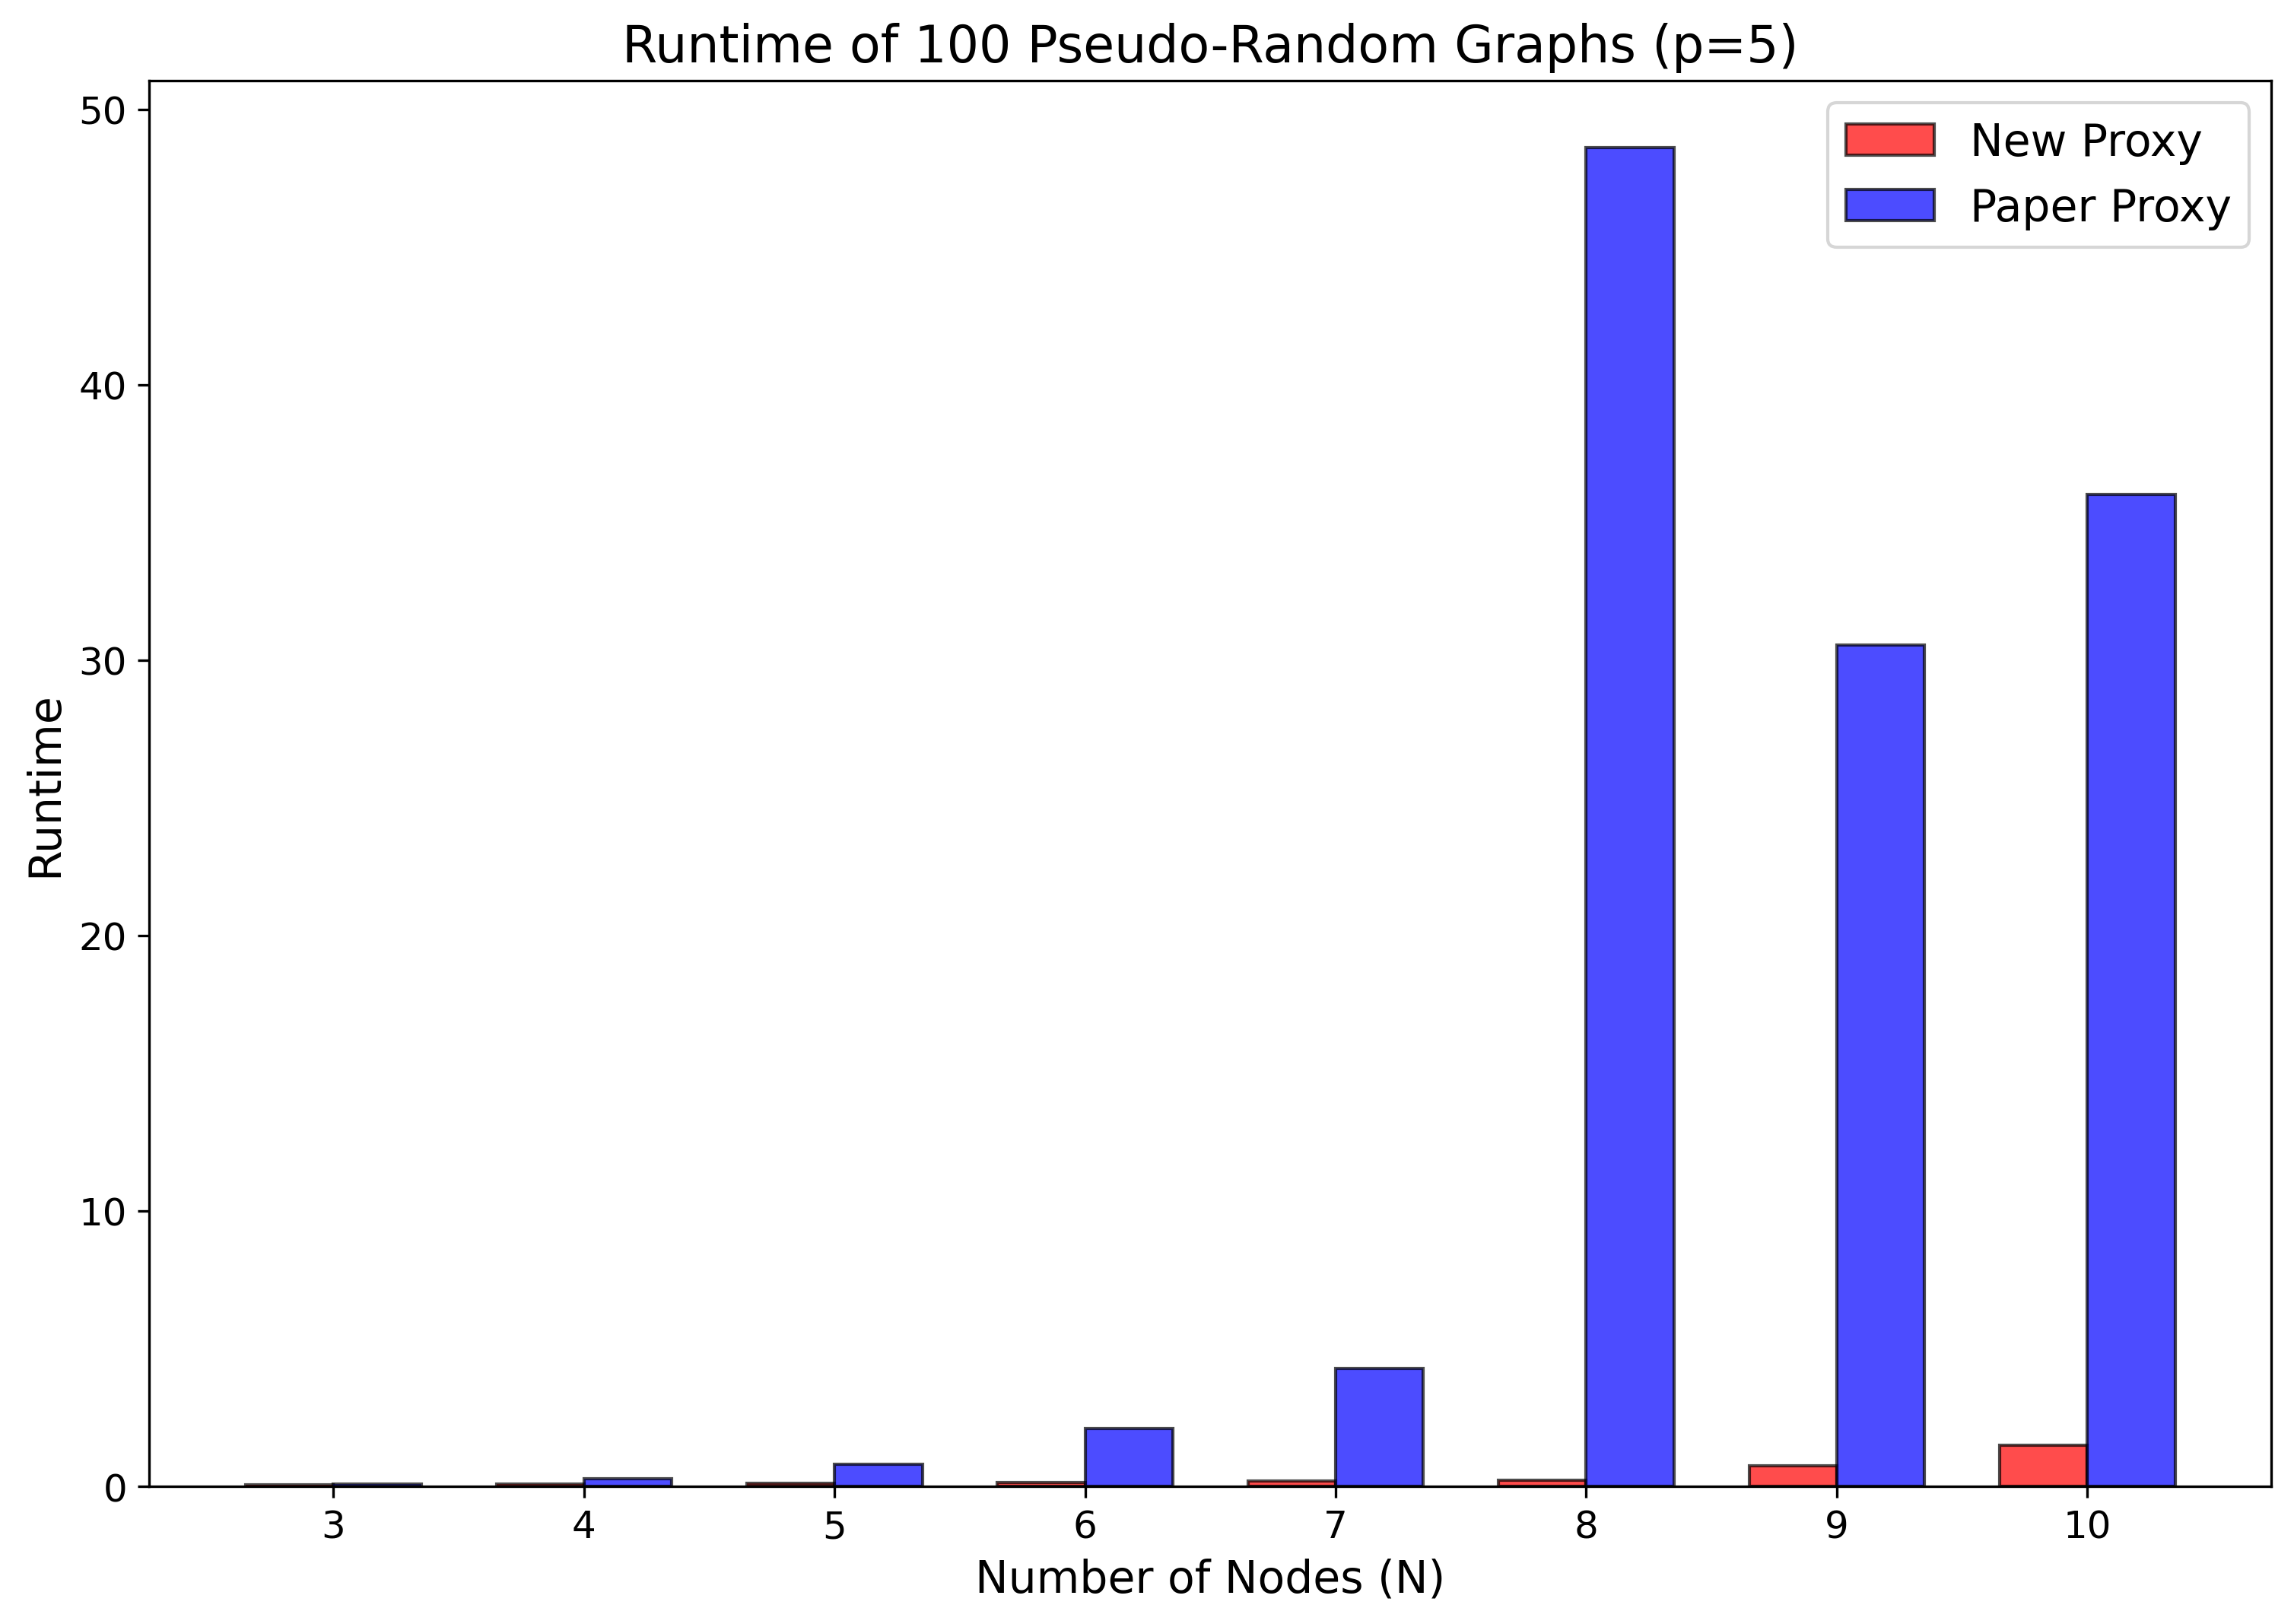

In [4]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import qokit.maxcut as mc
from QAOA_simulator import QAOA_run, get_simulator
import QAOA_proxy as qp
import QAOA_paper_proxy as qpp
import os  # データ保存に必要

# QAOAの層数
p = 5

runtime_new_proxy = []
runtime_paper_proxy = []

# 試行回数
T = 100

# 保存先ディレクトリを指定
save_dir = f"data_for_graphs_runtime_P={p}_T={T}"
os.makedirs(save_dir, exist_ok=True)

# Nを5から10まで変化させて計算
for N in range(3, 11):
    runtime_new_proxy_i = []
    runtime_paper_proxy_i = []

    for i in range(T):
        G = nx.erdos_renyi_graph(N, 0.5)
        ising_model = mc.get_maxcut_terms(G)
        sim = get_simulator(N, ising_model)

        init_gamma, init_beta = np.full((2, p), 0.1)

        result = qp.QAOA_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_new_proxy_i.append(runtime)
            print(f"New Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for New Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_new_proxy_N={N}_G{i}.npy", runtime)

        result = qpp.QAOA_paper_proxy_run(G.number_of_edges(), N, p, init_gamma, init_beta)
        # `result` の中に `runtime` が存在するか確認
        if "runtime" in result:
            runtime = result["runtime"]
            # 結果をリストに追加
            runtime_paper_proxy_i.append(runtime)
            print(f"Paper Proxy runtime for N={N}: {runtime}")
        else:
            print(f"Warning: 'runtime' not found for Paper Proxy with N={N}")

        np.save(f"{save_dir}/data_for_runtime_paper_proxy_N={N}_G{i}.npy", runtime)

    # 各Nに対しての平均を計算
    if runtime_new_proxy_i:
        avg_runtime_new_proxy = np.mean(runtime_new_proxy_i)
        runtime_new_proxy.append(avg_runtime_new_proxy)
    if runtime_paper_proxy_i:
        avg_runtime_paper_proxy = np.mean(runtime_paper_proxy_i)
        runtime_paper_proxy.append(avg_runtime_paper_proxy)


# 棒グラフの作成
bar_width = 0.35  # バーの幅
index = np.arange(3, 11)  # x軸のインデックス

# runtime_new_proxy と runtime_paper_proxy のサイズが index のサイズと一致するように調整
if len(runtime_new_proxy) != len(index):
    runtime_new_proxy = runtime_new_proxy[:len(index)]
if len(runtime_paper_proxy) != len(index):
    runtime_paper_proxy = runtime_paper_proxy[:len(index)]

# グラフのサイズと解像度の設定（figsizeとdpiを調整）
plt.figure(figsize=(12, 8), dpi=300)

# 新しいプロキシの棒グラフ（枠を黒色に設定）
plt.bar(index - bar_width / 2, runtime_new_proxy, bar_width, color='red', alpha=0.7, label='New Proxy', edgecolor='black')

# 論文プロキシの棒グラフ（枠を黒色に設定）
plt.bar(index + bar_width / 2, runtime_paper_proxy, bar_width, color='blue', alpha=0.7, label='Paper Proxy', edgecolor='black')

# グラフの設定
plt.xlabel('Number of Nodes (N)', fontsize=14)  # 横軸のラベル
plt.ylabel('Runtime', fontsize=14)  # 縦軸のラベル
plt.title(f'Runtime of {T} Pseudo-Random Graphs (p={p})', fontsize=16)  # 題名
plt.xticks(index, fontsize=12)  # x軸の目盛りのサイズ
plt.yticks(fontsize=12)  # y軸の目盛りのサイズ
plt.legend(prop={'size': 14})

# グラフをファイルとして保存
plt.savefig(f"{save_dir}/Runtime of {T} Pseudo-Random Graphs (P={p}).png", format='png', bbox_inches='tight')

# グラフの表示
plt.show()